In [2]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#####################################
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() #breast_cancer sample 데이터


In [5]:
# 표준화
scaler = StandardScaler()
scaler.fit(cancer.data)#어떤식으로 바꿔야하겠구나 학습
X_Scaled=scaler.transform(cancer.data) #표준화 적용시킴

In [7]:
# PCA로 차원 축소
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #두개의 주성분만 유지
pca.fit(X_Scaled) #어떤식으로 차원축소할지 학습

X_pca=pca.transform(X_Scaled) #두개의 주성분만 유지하는 데이터변환(차원축소,학습한거바탕)
print(X_Scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


C:\Users\hrim1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hrim1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


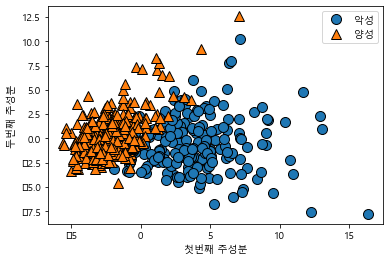

In [8]:
# 산점도 그래프 그리기
import mglearn
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["악성","양성"],loc="best")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

C:\Users\hrim1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hrim1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


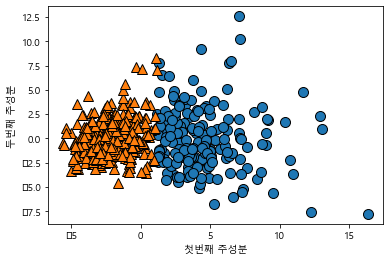

In [9]:
#clustering 해서 그래프 그려보기

import mglearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=2)
kmeans.fit(X_Scaled) #원본데이터로 clustering

#2차원이어야해서 그래프는 차원축소한걸로 그린다
#색깔은 원본데이터에서 나온 클러스터값
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],kmeans.labels_)

plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()